# Random Forest Regressor vs Decision Tree models FIFA 18
(Application of ML in CAE and CFD)

Random forests are made from numerous decisions trees, created on various subsets of the data
The final output is aggregated average of individual subsets.
This helps preventing overfitting.

Advantages of random forest and decision trees:
- Easy-to-use setup and their ability to be quite accurate on datasets with many features.
- Abily to gauge the importance "ranking" of the different features used.
- Variety of interpretations to the model predictions.

The objective of the ML model is to make accurate prediction on who was the man of the match award is given and capture non-linear relatioship.

For this work, the FIFA 2018 World Cup dataset will be used which comprises of statistics from all the matches in the 2018 tournament (refer to):
1) [Dataset from Kaggle](https://www.kaggle.com/mathan/datasets)
2) [Random Forest Regressor exampe](https://www.kaggle.com/code/adityadeshpande23/fifa-19-random-forest-regressor). 
3) [Further resources.](https://medium.com/@jainvidip/understanding-random-forest-0ca15aaa443c)

In [189]:
# importing libraries
import numpy as np#linear algebra
import pandas as pd#data processing
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn import tree


# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

#### Loading the dataset

In [190]:
# Importing the FIFA dataset
# and inspecting the data
path ="/home/conmec/Python/Machine_learning_Deep_learning/input/"

# read the dataset from FIFA2018 World 
df = pd.read_csv(path+"FIFA2018Statistics.csv")
df.head()


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


Exploratory Data Analysis on the FIFA dataset

In [191]:
df.shape

(128, 27)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    128 non-null    object 
 1   Team                    128 non-null    object 
 2   Opponent                128 non-null    object 
 3   Goal Scored             128 non-null    int64  
 4   Ball Possession %       128 non-null    int64  
 5   Attempts                128 non-null    int64  
 6   On-Target               128 non-null    int64  
 7   Off-Target              128 non-null    int64  
 8   Blocked                 128 non-null    int64  
 9   Corners                 128 non-null    int64  
 10  Offsides                128 non-null    int64  
 11  Free Kicks              128 non-null    int64  
 12  Saves                   128 non-null    int64  
 13  Pass Accuracy %         128 non-null    int64  
 14  Passes                  128 non-null    in

Find if there are missing values

In [193]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
missing_values_count

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [194]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

7.696759259259259

Seems like 7.69% of the values are missing
##Filling in missing values automatically
Use Panda's fillna() function to fill in missing values in a dataframe.i.e fill NaN with 0.

In [195]:
# Create a temporary dataset
df_temp = df

# replace all NA's with 0
df_temp.fillna(0).head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,0.0,0.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,0.0,Group Stage,No,0,0.0,0.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,0.0,Group Stage,No,0,0.0,0.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,0.0,0.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,0.0,Group Stage,No,0,1.0,90.0


Check the goals by grouping by

In [196]:
df_goals = df_temp.groupby(by = "Goal Scored").count()
df_goals

,Date,Team,Opponent,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Goal Scored,,,,,,,,,,,,,,,,,,,,,
0,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,0,33,33,33,4,4
1,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,44,45,45,45,5,5
2,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,2,2
3,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,0,0
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,1
5,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0,0
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


In [197]:
positive = df_temp[df_temp['Man of the Match'] == "Yes"].count()
negative = df_temp[df_temp['Man of the Match'] == "No"].count()
print( 'Man of the match =' , positive,'failed = ', negative)

Man of the match = Date                      64
Team                      64
Opponent                  64
Goal Scored               64
Ball Possession %         64
Attempts                  64
On-Target                 64
Off-Target                64
Blocked                   64
Corners                   64
Offsides                  64
Free Kicks                64
Saves                     64
Pass Accuracy %           64
Passes                    64
Distance Covered (Kms)    64
Fouls Committed           64
Yellow Card               64
Yellow & Red              64
Red                       64
Man of the Match          64
1st Goal                  62
Round                     64
PSO                       64
Goals in PSO              64
Own goals                  4
Own goal Time              4
dtype: int64 failed =  Date                      64
Team                      64
Opponent                  64
Goal Scored               64
Ball Possession %         64
Attempts                  64
O

In [198]:
df.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [199]:
df_temp.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

define features and outcome

In [200]:
# Selecting the features to test for the RandomForestRegressor
features = ['Goal Scored', 'Attempts', 'On-Target', 
            'Ball Possession %','Free Kicks', 
            'Passes', 'Pass Accuracy %',
            'Distance Covered (Kms)']

outcome = 'Man of the Match'

# convert categorical data to numerical
manofmatch = {'Yes':1, 'No':0}
df_temp['Man of the Match'] = [manofmatch[item] for item in df_temp['Man of the Match']]

Create the Random Forest 

In [201]:
# Preprocessing the data and splitting into features and labels
#X = df_temp.iloc[:,[3, 5, 6, 7, 15]].values
#Y = df_temp.iloc[:,18].values
#X = X.reshape(-1, 5)

X = df_temp[features]
Y = df_temp[outcome]

In [202]:
X.columns

Index(['Goal Scored', 'Attempts', 'On-Target', 'Ball Possession %',
       'Free Kicks', 'Passes', 'Pass Accuracy %', 'Distance Covered (Kms)'],
      dtype='object')

#### Split the train/test data


In [203]:
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=400)

#### Build the Random Forest model

In [204]:

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Create regressor
regressor = RandomForestRegressor(n_estimators=100,
                                  max_depth=5,
                                  max_features="sqrt",
                                  oob_score=True, 
                                  random_state=41)

#Fit model for (X,y) dataset
regressor.fit(X_train, Y_train)

#Test the model on output data
Y_pred = regressor.predict(X_test)

In [205]:
regressor.score(X_test, Y_test)

0.027184105164341443

#### Find the feature importance
Show the importance of each feature to make accurate predictions, relative to the others in a trained model.
Find out which features are important to drive the model's predictions, interpreting resutls and tendencies of model and providing aid in featuring engineering exercises.

<BarContainer object of 8 artists>

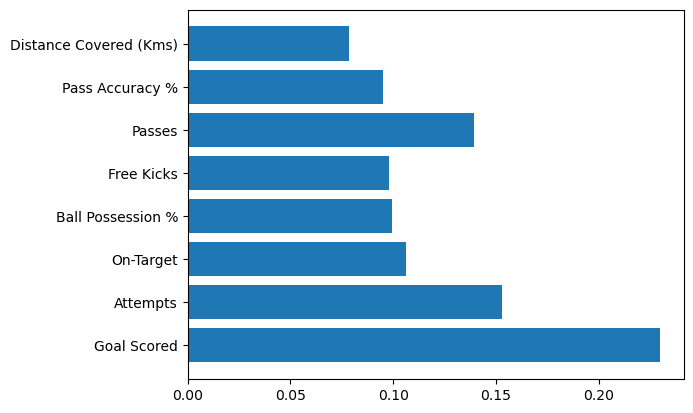

In [206]:
# Extract feature importance and plot
#feature_names = df_temp.columns[[3,5,6,11, 15,20]].tolist()
#feature_names
importances = regressor.feature_importances_
plt.barh(features, importances)

Partial dependence plot:
- Used to visualize the way changing one feature affects the predicted outcome by keeping other features constant. 
- Useful to see how the predictions will vary by changing one input over a broad range in a systematic way where other changes are limited.
- x-axis is the grid(feature) values chosen
- y-axis is a change in model prediction relative to leftmost value.

0 ['Goal Scored']


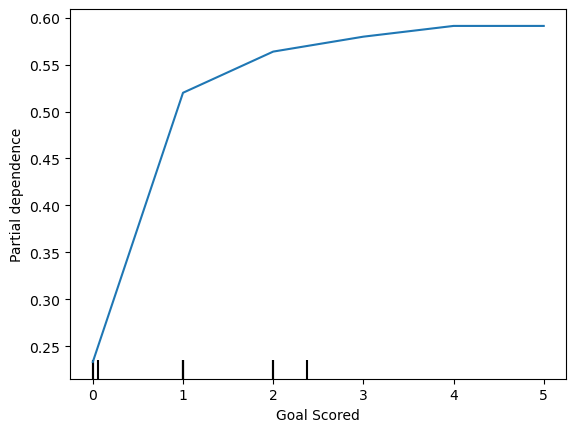

1 ['Distance Covered (Kms)']


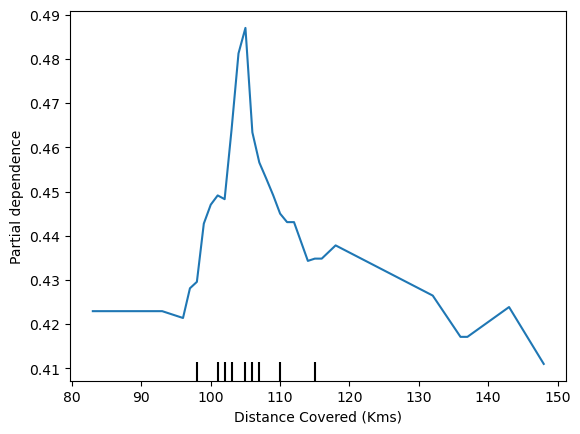

In [214]:
# Plot goals scored dependence from random forest model
# the first set is from the RandomRegressor tree
from sklearn.inspection import PartialDependenceDisplay

feature_list = [['Goal Scored'],['Distance Covered (Kms)']]
for i, var in enumerate(feature_list):
    print(i, var)
    Display1 = PartialDependenceDisplay.from_estimator(regressor, 
                                                   X_train, feature_list[i])
    plt.show()

In [217]:
# Plot goals scored dependence from classic decision model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=3,
                             min_samples_leaf=5)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_test, Y_test)

0.6538461538461539

0 ['Goal Scored']


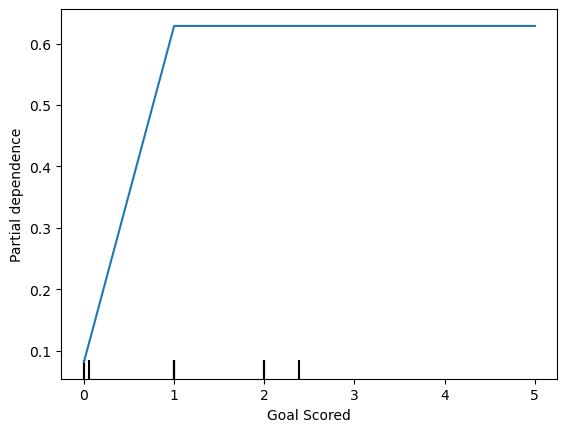

1 ['Distance Covered (Kms)']


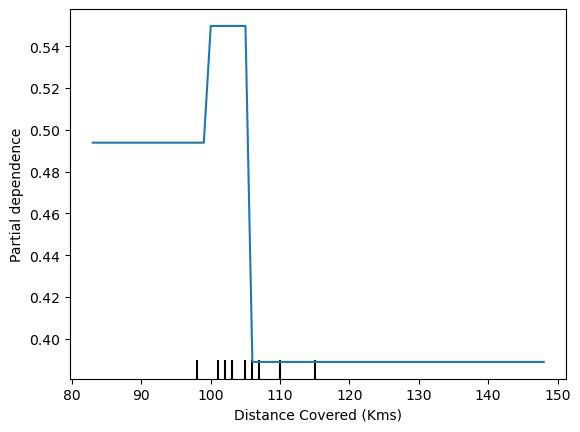

In [218]:
feature_list = [['Goal Scored'],['Distance Covered (Kms)']]
for i, var in enumerate(feature_list):
    print(i, var)
    Display2 = PartialDependenceDisplay.from_estimator(clf, 
                                                   X_train, feature_list[i])
    plt.show()

In [220]:
# Get the score from the  random forest model and test it
rfc = RandomForestClassifier( max_depth=3,
                         n_estimators=10, random_state=0)
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
rfc.score(X_test, Y_test)

0.6538461538461539

0 ['Goal Scored']


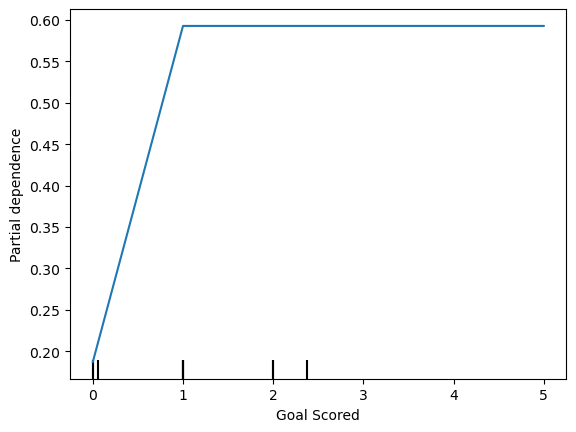

1 ['Distance Covered (Kms)']


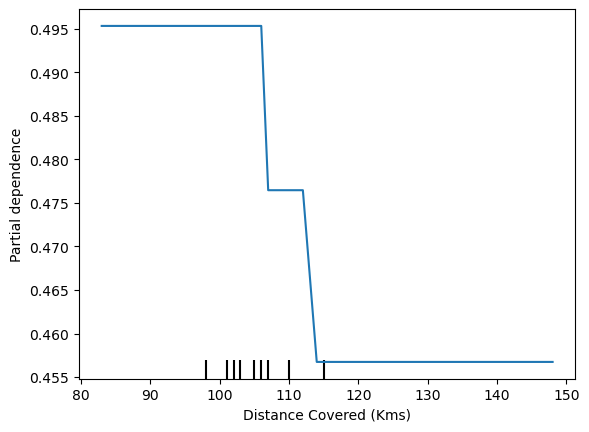

In [211]:
feature_list = [['Goal Scored'],['Distance Covered (Kms)']]
for i, var in enumerate(feature_list):
    print(i, var)
    Display3 = PartialDependenceDisplay.from_estimator(rfc, 
                                                   X_train, feature_list[i])
    plt.show()

From the above, we can see if a player scores their first goal,it significantly boosts their chances to win the award. For the distance
covered, we can see a pretty unrealistic result from decision tree classifier model and much less piece-wise relationship from RandomForestRegressor model compared to the other two.

### Tree model visualization
Visualizing a few individual trees can help in understanding the decision-making  process.
Looking at one specific tree is of limited value and it is best to have some key things to inspect over a small selection of trees: analyze splits across several tress, evaluate complexity trees on the validation set  or bad performance to understand yout model behavior.

In [159]:
!pip3 install graphviz

Tree Visualizations:
Plot the flowchart-like structure with the internal nodes that represent decisions based on feature values,
leading to terminal leaves which signify predictions. The visualisation, helps in understanding the decision-making process.

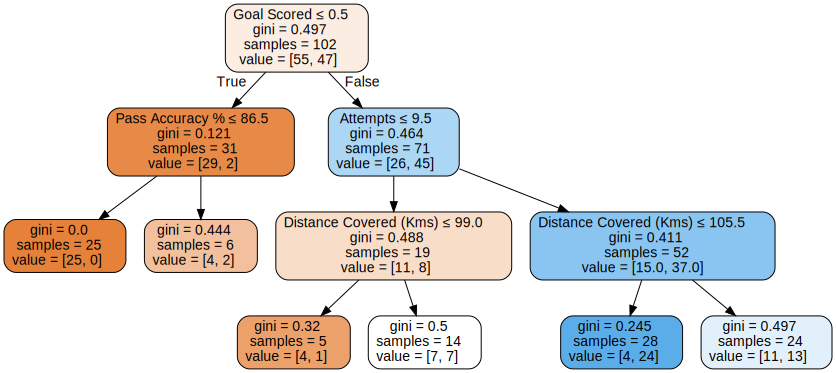

In [221]:
# Splitting criteria is shown at the top
# The bracketed values at the bottom indicate the count
# which go either True or False
import graphviz
from sklearn.tree import export_graphviz

# Assuming 'model' is your trained decision tree classifier
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=features,
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt
#
## Assuming 'model' is your trained decision tree classifier
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
#plot_tree(clf, feature_names=features, filled=True)
#fig.savefig('clf.png')

Analyzing the splits of the about visualisation from a particular feature, could indicate a strong pattern and the performance of the tree.

In [161]:
!pwd

/home/conmec/Python/Machine_learning_Deep_learning


#### Out-of-Bag(OOB) Error Rate Plot:
Using the OOB samples to estimate error and plot the OOB error rate as more trees are added.
Understanding if adding more trees improves the model and can help conserve compute resources by not adding more trees than necessary when error has plateaued.

In [162]:
# Create a random forest tree classifier with OOB
rfc = RandomForestClassifier(n_estimators=100, 
                             oob_score=True, 
                             random_state=42)
rfc.fit(X_train, Y_train)
oob_error = 1 - rfc.oob_score_
print(f'OOB error: {oob_error:.3f}')

OOB error: 0.402


/home/conmec/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


For n_estimators = 1
OOB score is 0.5196078431372549
************************
For n_estimators = 1
OOB score is 0.5980392156862745
************************
For n_estimators = 1
OOB score is 0.6078431372549019
************************
For n_estimators = 1
OOB score is 0.6862745098039216
************************
For n_estimators = 1
OOB score is 0.6666666666666666
************************
For n_estimators = 1
OOB score is 0.6666666666666666
************************
For n_estimators = 1
OOB score is 0.6372549019607843
************************
For n_estimators = 1
OOB score is 0.6568627450980392
************************
For n_estimators = 1
OOB score is 0.6470588235294118
************************
For n_estimators = 1
OOB score is 0.6274509803921569
************************


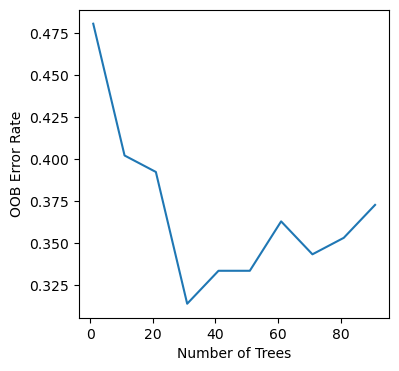

In [163]:
# Define the rannge of trees to evaluate
n_trees_range = range(1, 100, 10)
oob_error_rates = []
for n_trees in n_trees_range:
    # Train a random forest with OOB score enabled
    rf = RandomForestClassifier(n_estimators=n_trees,
                                oob_score=True, 
                                random_state=42)
                                
    rf.fit(X_train, Y_train)

     # Compute the OOB error rate
    oob_error = 1 - rf.oob_score_
    oob_error_rates.append(oob_error)
    print('For n_estimators = '+str(i))
    print('OOB score is '+str(rf.oob_score_))
    print('************************')

#oob_error_rates
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=100)
plt.plot(n_trees_range, oob_error_rates)
plt.ylabel("OOB Error Rate")
plt.xlabel("Number of Trees")


plt.show()
#fig.savefig('clf.png')

In [164]:
Y_pred = rfc.predict(X_test)
rfc.score(X_test, Y_test)

0.6153846153846154

In [165]:
rfc.feature_importances_

array([0.204861  , 0.14807706, 0.09537015, 0.11100703, 0.10894735,
       0.13569448, 0.09609178, 0.09995114])

In [166]:
imp_feat=pd.Series(rfc.feature_importances_,index=X.columns.tolist())

In [167]:
imp_feat.sort_values(ascending=False)

Goal Scored               0.204861
Attempts                  0.148077
Passes                    0.135694
Ball Possession %         0.111007
Free Kicks                0.108947
Distance Covered (Kms)    0.099951
Pass Accuracy %           0.096092
On-Target                 0.095370
dtype: float64

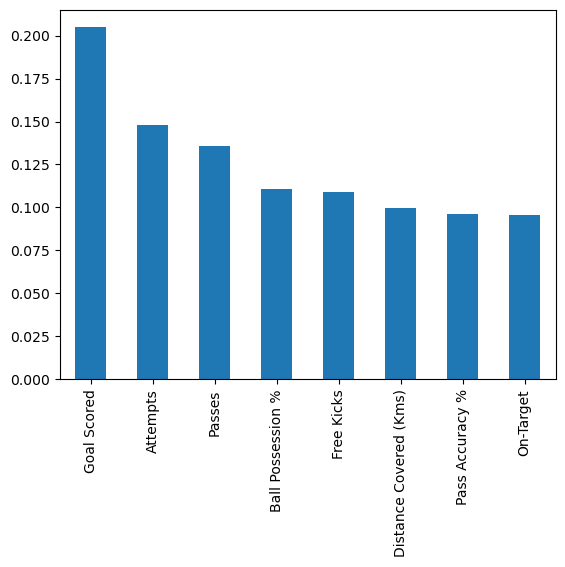

In [168]:
graph=imp_feat.sort_values(ascending=False).plot(kind='bar')

In [169]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6153846153846154
Confusion Matrix:
[[ 6  3]
 [ 7 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.67      0.55         9
           1       0.77      0.59      0.67        17

    accuracy                           0.62        26
   macro avg       0.62      0.63      0.61        26
weighted avg       0.66      0.62      0.62        26



# Summary
- Random forect performs better than the Randomregressor tree with a 68%.
- Random forest tree combat overfitting to training data compared to decision trees.
- XGBoost (Extreme Gradient Boosting) can be used for ensemple multiple decision trees, each trained on a random subset of the data,
to produce more generalised predictions. It takes a gradient boosting approach, iteratively adding new trees that correct the errors of the 
existing ensemble. This method can improve performance and efficiency of the previous models.
- Using OOB and training more trees in a random forest, requires more CPU time.